In [25]:
# Feature Scaling is a technique to standarize the independent features present in the data in a fixed range

In [26]:
# Standardization (Z-score normalization) scales features so that
# each feature after scaling it has mean = 0 and standard deviation = 1   .
# It is called zero-score technique because data is centered around zero.
# Formula: z = (x - mean) / std
# Used to help scale-sensitive ML algorithms perform better.

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv('Social_Network_Ads.csv')

In [29]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [30]:
df = df.iloc[:, 2:]

In [31]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


# Train-Test Split

In [32]:
# Extracting Input and Output columns
X = df.iloc[:,:2]   # input dataset
Y = df.iloc[:,-1]   # output dataset

In [33]:
X.head(2)

,Age,EstimatedSalary
0,19,19000
1,35,20000


In [34]:
Y.head(2)

0    0
1    0
Name: Purchased, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=0)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((280, 2), (120, 2), (280,), (120,))

In [48]:
from sklearn.preprocessing import StandardScaler   # Import StandardScaler class for Z-score feature scaling

scaler = StandardScaler()                           # Create a StandardScaler object (no scaling yet)

scaler.fit(X_train)                                 # Compute mean and standard deviation from training data only
                                                    # No need to compute mean and std for test data 
                                                    # Because For test data you will use mean of std of Traning data itself

X_train_scaled = scaler.transform(X_train)          # Scale training data using learned mean and std

X_test_scaled = scaler.transform(X_test)            # Scale test data using SAME train statistics (avoids data leakage)


In [49]:
X_train.head(2)      # we gave a dataframe to the model for scaling

,Age,EstimatedSalary
92,26,15000
223,60,102000


In [50]:
X_train_scaled    # But now, after scaling, our model is giving us the data as a numpy arrays

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [46]:
# So, here lets convert that array into a dataframe
X_train_scaled1 = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled1 = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [51]:
X_train_scaled1

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [52]:
# Mathematically summerizing the original dataset X_train
X_train.describe()

,Age,EstimatedSalary
count,280.000000,280.000000
mean,37.864286,69807.142857
std,10.218201,34641.201654
min,18.000000,15000.000000
25%,30.000000,43000.000000
50%,37.000000,70500.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [57]:
# Mathematically summerizing the trained and scaled dataset X_train
np.round(X_train_scaled1.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


In [58]:
# above you can see the mean of the scaled data set is = 0 and standard deviation = 1

In [65]:
# Now lets see if scaling a data will actually affects the data or it will just scale it in a fixed range around zero

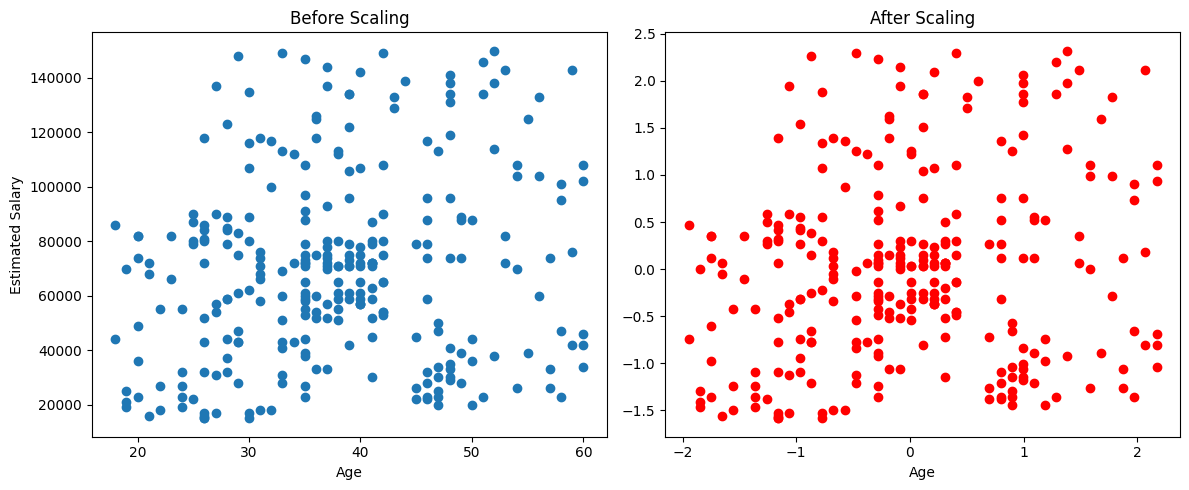

In [71]:
# To visualize two scatter plots side-by-side, you can use the plt.subplots() function to create a grid with one row and two columns. 

# 1. Create a figure with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# 2. Plot the first scatter plot on the left axis (ax1)
ax1.scatter(x='Age', y='EstimatedSalary', data=X_train)
ax1.set_title("Before Scaling")
ax1.set_xlabel("Age")
ax1.set_ylabel("Estimated Salary")

# 3. Plot the second scatter plot on the right axis (ax2)
# Replace 'OtherColumn' with your actual data column
ax2.scatter(x='Age', y='EstimatedSalary', data=X_train_scaled1, color='red')
ax2.set_title("After Scaling")
ax2.set_xlabel("Age")
ax1.set_ylabel("Estimated Salary")

# 4. Use tight_layout to prevent overlapping labels
plt.tight_layout()
plt.show()


In [67]:
# U can easily see the scattering pattern of the data is same but the numbering on X-axis and Y-axis is different
# This means, no data was affected and the scaling was successfully done